In [17]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [18]:
def clean_metabolite_ids(df, column='Compound'):
    new = df.copy()
    # Remove (1), (2) etc. from the index
    new[column] = df[column].str.replace(r"\(.*\)", "") 
    # Remove leading and trailing whitespaces
    new[column] = new[column].str.strip()
    # Straify upper and lower case 
    new[column] = new[column].str.upper()
    return new

In [21]:
df_soleus = pd.read_csv('./../data/soleus_myocyte_pmt_tracing_labeling_combined_240731.csv')   
df_soleus = clean_metabolite_ids(df_soleus)
df_soleus.head()

/var/folders/n5/kq0k2frx06l30kyysqmgk1lw0000gn/T/ipykernel_93789/3325772090.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  new[column] = df[column].str.replace(r"\(.*\)", "")


,Compound,C_Label,Control_100ppm_1,Control_100ppm_2,Control_100ppm_3,Control_500ppm_1,Control_500ppm_2,Control_500ppm_3,Insulin_100ppm_1,Insulin_100ppm_2,Insulin_100ppm_3,Insulin_500ppm_1,Insulin_500ppm_2,Insulin_500ppm_3
0,PHENYLALANINE,0,1.0,1.0,1.0,0.994558,1.0,1.0,0.993559,1.0,1.0,1.0,0.994757,1.0
1,PHENYLALANINE,1,0.0,0.0,0.0,0.005442,0.0,0.0,0.006441,0.0,0.0,0.0,0.005243,0.0
2,PHENYLALANINE,2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,PHENYLALANINE,3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,PHENYLALANINE,4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [32]:
df_soleus_mlt = df_soleus.melt(id_vars=['C_Label','Compound'], ignore_index=True)

# Parse the variable column into three columns
df_soleus_mlt['insulin'] = df_soleus_mlt['variable'].str.extract(r"(.*)_(.*)_(.*)")[0]
df_soleus_mlt['palmitate'] = df_soleus_mlt['variable'].str.extract(r"(.*)_(.*)_(.*)")[1]
df_soleus_mlt['sample'] = df_soleus_mlt['variable'].str.extract(r"(.*)_(.*)_(.*)")[2]

df_soleus_mlt = df_soleus_mlt.drop(columns=['variable'])
df_soleus_mlt.head()


,C_Label,Compound,value,insulin,palmitate,sample
0,0,PHENYLALANINE,1.0,Control,100ppm,1
1,1,PHENYLALANINE,0.0,Control,100ppm,1
2,2,PHENYLALANINE,0.0,Control,100ppm,1
3,3,PHENYLALANINE,0.0,Control,100ppm,1
4,4,PHENYLALANINE,0.0,Control,100ppm,1


In [55]:


def stacked_bar_graph(df, metabolite, groups=['insulin', 'palmitate'], value='value'):

    df = df[df['Compound'] == metabolite]

    groups = ['C_Label'] + groups   

    mean = df.groupby(groups)[value].mean().reset_index()
    std = df.groupby(groups)[value].std().reset_index()

    # Stack C_Label on top of each other
    fig, ax = plt.subplots()
    bottom = None
    for i, group in enumerate(sorted(mean['C_Label'].unique())):
        data = mean[mean['C_Label'] == group]
        data_std = std[std['C_Label'] == group]
        ax.bar(data[groups[1]], data[value], yerr=data_std[value], label=group, bottom=bottom)
        bottom = data[value]


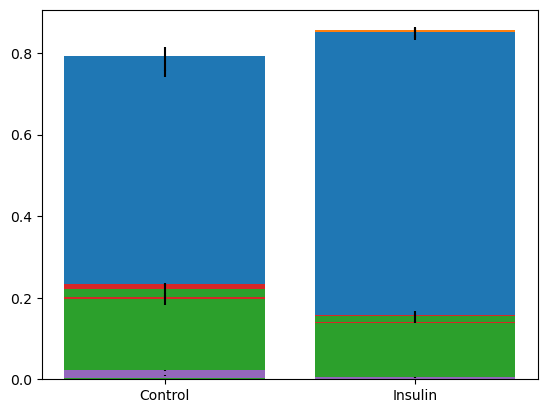

In [56]:
stacked_bar_graph(df_soleus_mlt, 'A-KETOGLUTARATE')